In [1]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/content/Iris.csv')  # Replace with the actual path to your file


In [2]:
# View the first few rows of the dataset
print(df.head())

# Check the shape (number of rows and columns)
print("Shape of the dataset:", df.shape)

# Check data types and for missing values
print(df.info())

# Summary statistics for numerical columns
print(df.describe())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
Shape of the dataset: (150, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usag

In [3]:
# Drop the 'Id' column, as it's not useful for analysis
df = df.drop(columns='Id')

# Check for duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 3


 1.Generate summary statistics (mean, median, std, etc.).

In [4]:
# Summary statistics for numeric columns
print(df.describe())


       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


In [16]:
print("\nMedian Values:\n", df.median(numeric_only=True))



Median Values:
 SepalLengthCm    5.80
SepalWidthCm     3.00
PetalLengthCm    4.35
PetalWidthCm     1.30
dtype: float64


2.Create histograms and boxplots for numeric features.

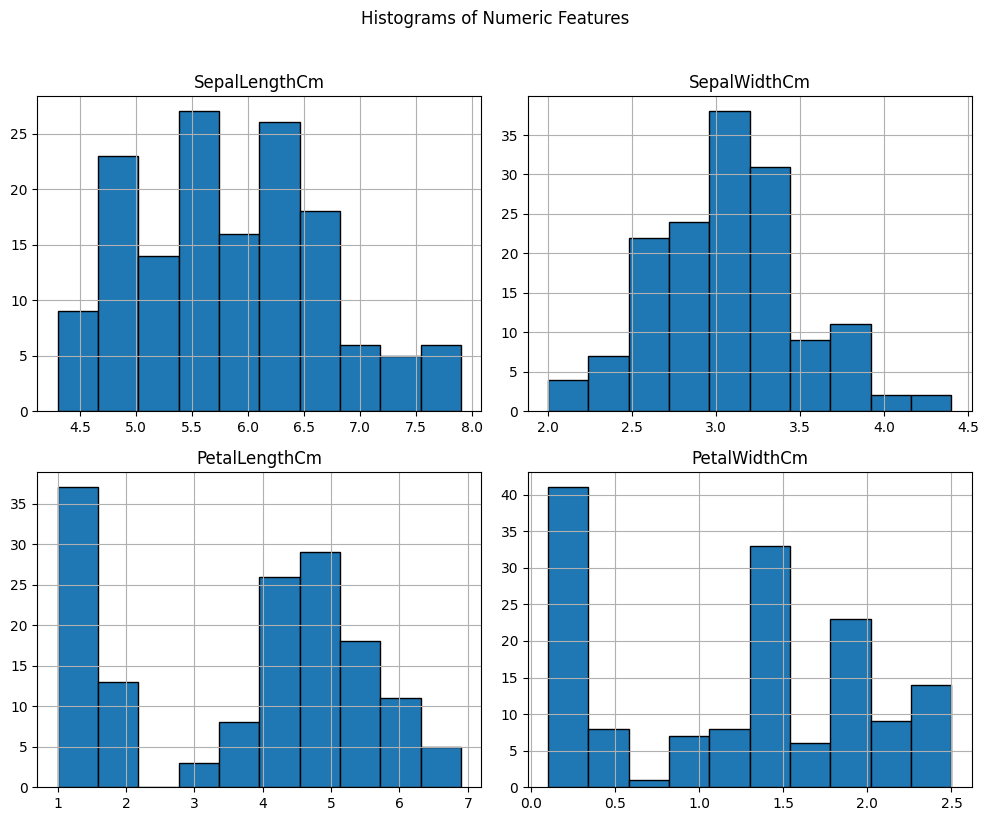

In [5]:
# Plot histograms for all numeric features
df.hist(figsize=(10, 8), edgecolor='black')
plt.suptitle("Histograms of Numeric Features", y=1.02)
plt.tight_layout()
plt.show()


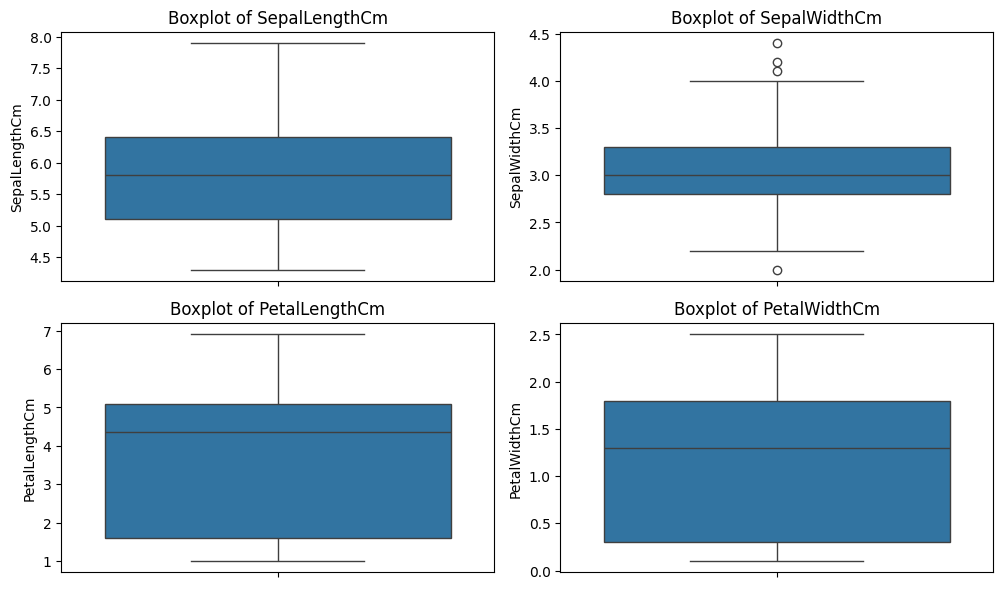

In [6]:
# Create boxplots for each numeric feature
plt.figure(figsize=(10, 6))
for i, column in enumerate(df.columns[:-1], 1):  # Exclude 'Species' (the categorical column)
    plt.subplot(2, 2, i)  # Plot in a 2x2 grid
    sns.boxplot(y=df[column])  # Create boxplot for each numeric column
    plt.title(f"Boxplot of {column}")
plt.tight_layout()
plt.show()


 3.Use pairplot/correlation matrix for feature relationships.

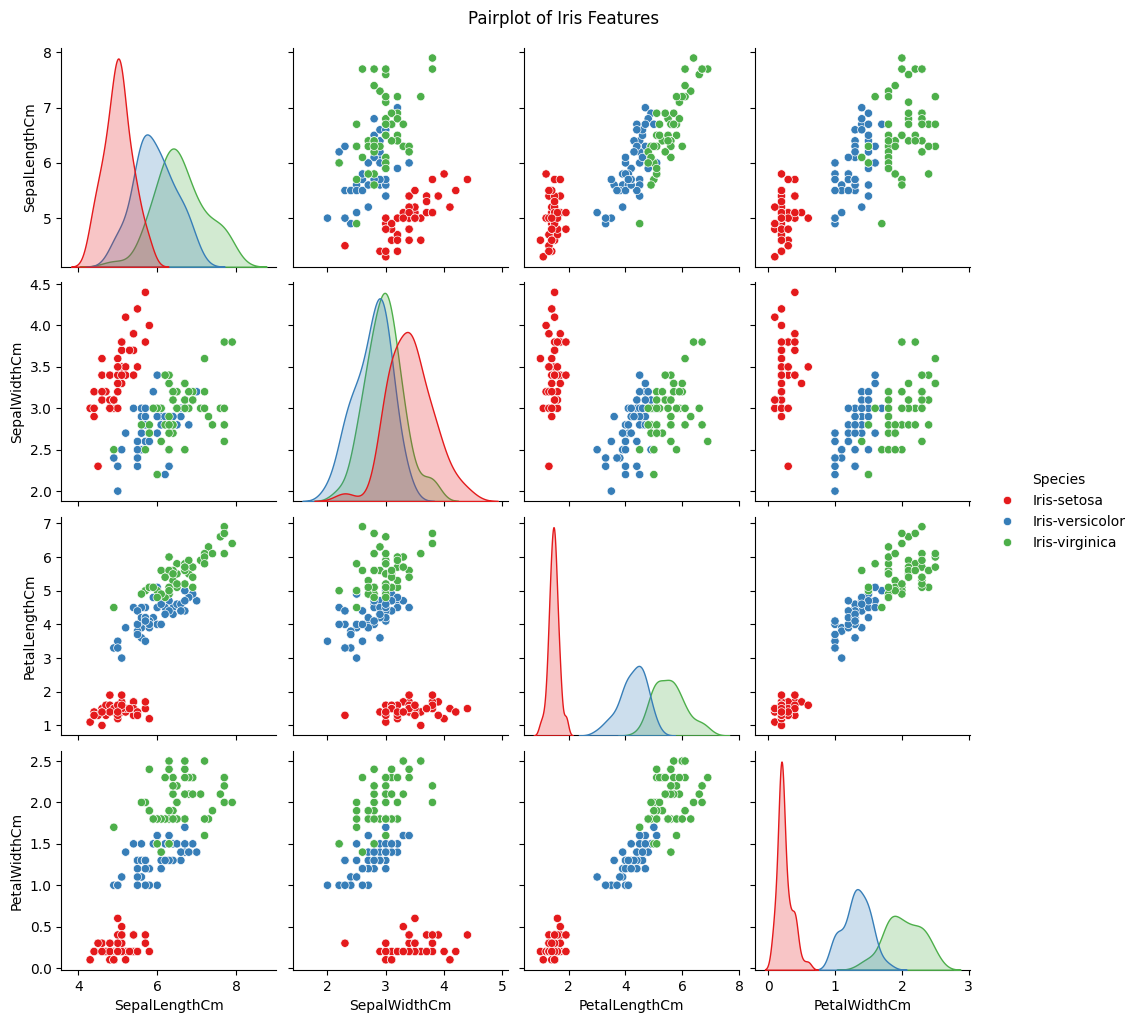

In [7]:
# Create a pairplot with color differentiation by species
sns.pairplot(df, hue='Species', palette='Set1')
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()


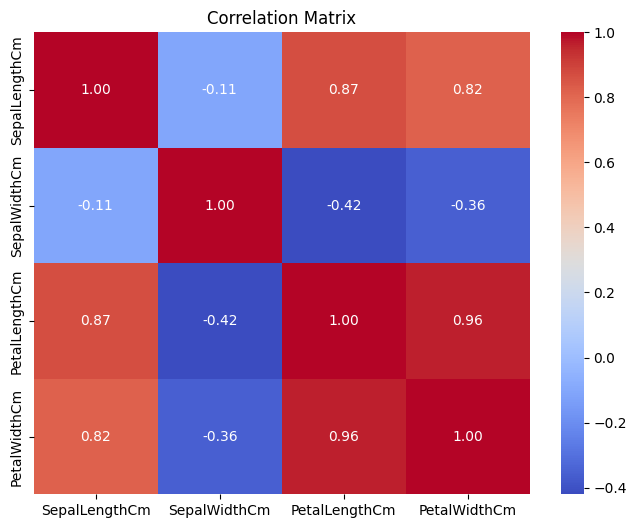

In [9]:
# Exclude the 'Species' column for correlation calculations
numeric_df = df.drop(columns='Species')

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


 4.Identify patterns, trends, or anomalies in the data.

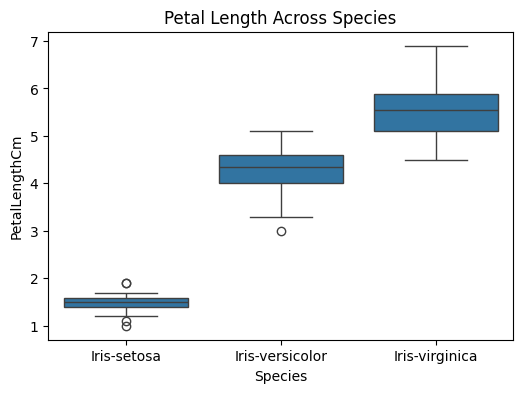

In [10]:
# Check the boxplot for PetalLengthCm across species to spot any outliers or anomalies
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Species', y='PetalLengthCm')
plt.title('Petal Length Across Species')
plt.show()

In [14]:
import plotly.express as px

# Create an interactive scatter plot using Plotly
fig = px.scatter(df, x='PetalLengthCm', y='PetalWidthCm', color='Species',
                 title='Petal Length vs Width', template='plotly_dark')
fig.show()




 5.Make basic feature-level inferences from visuals

In [15]:
# 5. Basic Feature-Level Inference
print("\nMean feature values by species:\n", df.groupby("Species").mean(numeric_only=True))


Mean feature values by species:
                  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                                  
Iris-setosa              5.006         3.418          1.464         0.244
Iris-versicolor          5.936         2.770          4.260         1.326
Iris-virginica           6.588         2.974          5.552         2.026


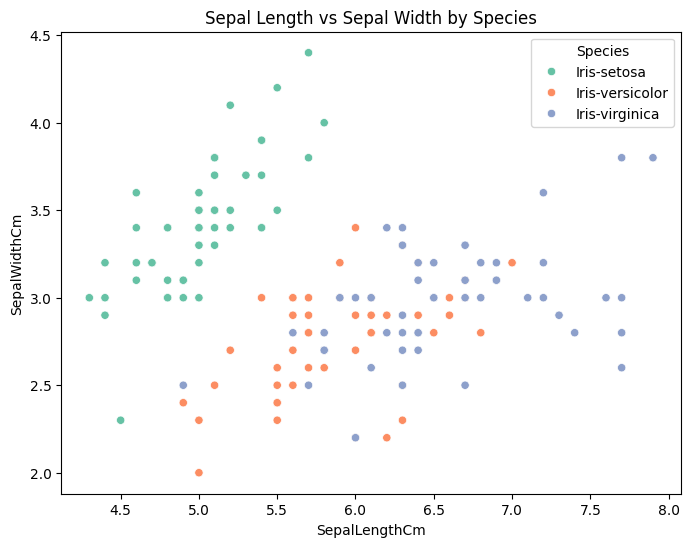

In [18]:
# Scatter plot of Sepal Length vs Sepal Width, color by Species
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species', palette="Set2")
plt.title("Sepal Length vs Sepal Width by Species")
plt.show()
